<a href="https://colab.research.google.com/github/jiminAn/2023_SUMMER_SAMSUNG_DL/blob/main/%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/Day4/Day_4_3_RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 4.3 RNN Basic
### 실습 목표
- RNN 모델의 입력 데이터 형태를 살펴보고 모델을 정의해보자

### Contents
1. RNN 모델의 입력 데이터 형태
2. RNN 모델 정의
  1. vanila RNN
  2. LSTM


## 0. RNN & LSTM 복습

### 시계열 데이터란?

시(time)계열 데이터로, 시간의 흐름이 포함되어 있는 데이터

1. 음악
2. 주식
3. 영화
...

시계열 데이터로 굳이 분류해서 다루는 이유는 무엇일까?

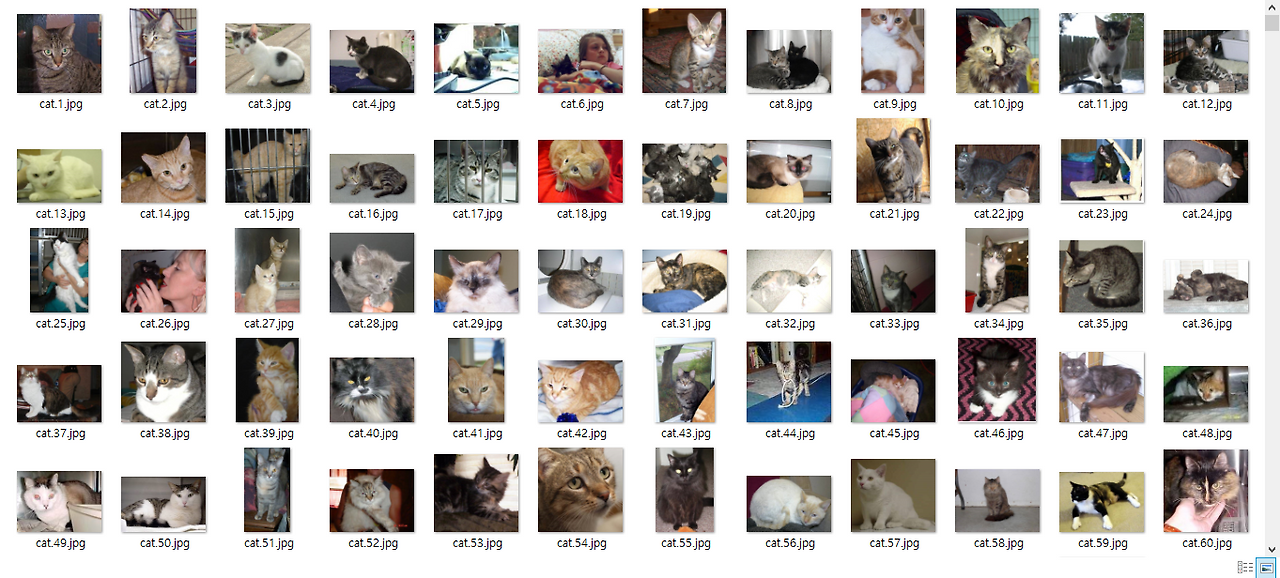

### 각 고양이 사진들은 서로에게 어떤 영향을 주지 않는다, 데이터의 순서가 바뀌어도 문제가 없다 => 하지만, 이것이 주식 데이터 였다면...?

###**" 기존에 배웠던 CNN만으로는 "순서"와 관련된 개념을 모델에 포함시키기가 어렵다"**

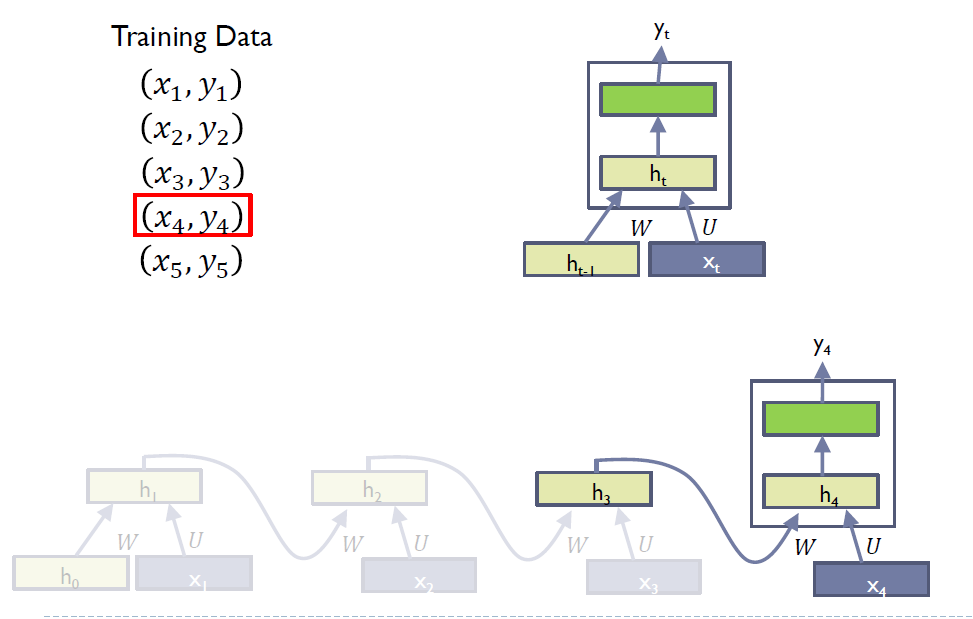

### 이전 layer에서 일어났던 계산들을 저장함으로써, 데이터 간의 관계를 만들 수 있다

## 0. Setting
- DL 관련 library 호출
- GPU 설정

In [1]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


## 1. RNN 모델의 입력 데이터 형태

### 예시: "hello"를 RNN 모델의 입력 데이터로 넣어보자.
![img.png](https://3863425935-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LIA3amopGH9NC6Rf0mA%2F-M4bJ-IWAKzglR0XHFwU%2F-M4bJ3KvyPXdSmZt6cU6%2Flanguage-model.png?generation=1586576265109629&alt=media)


In [3]:
#"hello"를 one-hot encoding을 사용하여 벡터로 치환해봅시다
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [4]:
input_data_np = np.array([[h, e, l, l, o]], dtype=np.float32)
input_data = torch.Tensor(input_data_np)
input_data

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]])

- 앞에서 선언한 벡터를 이용하여 추가로, "eolll", "lleel"를 벡터로 치환해봅시다

In [5]:
# transform as torch tensor
input_data_np = np.array([[h, e, l, l, o],
                          [e, o, l, l, l],
                          [l, l, e, e, l]], dtype=np.float32)
input_data = torch.Tensor(input_data_np)
input_data


tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]])

In [9]:
# (batch size, seq length(time step), input_size)
input_data.size()

#하나의 알파벳을 정의하는데 4개의 숫자가 필요 = 4
#총 5개의 알파벳으로 하나의 단어를 정의 = 5
#총 3개의 단어를 하나의 data로 사용 = 3

torch.Size([3, 5, 4])

## 1. RNN 계열 모델 정의
1. Vanila RNN
2. LSTM




### 2.1 Vanila RNN

#### `torch.nn.RNN(input_size, hidden_size, batch_first)`
- [pytorch document](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)
- `input_size`: 입력해 주는 특성 값의 개수
- `hidden_size`: hidden state의 사이즈 지정. 보통 arbitrary 함.
- `batch_first`: 입력으로 받는 데이터의 shape중 첫 번째 차원을 batch로 간주할 것인지를 설정.
  - True: (batch, seq, feature)
  - False: (seq, batch, feature)

In [10]:
# declare dimension
input_size = 4
hidden_size = 3

# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # 처음에 batch_size or seq_length

In [11]:
input_data

#Hell / eoll / llee 3개의 데이터를 한번에 처리 => batch_size 3

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]])

#Excercise 1. 아래 코드를 돌리기 전에, output의 형태가 어떤 형태로 나올지 예상해 보세요

### outpus는 모든 "hidden state"를 보여줍니다
### status는 "마지막"에 나온 결과값을 보여줍니다

In [12]:
# check output
outputs, _status = rnn(input_data)

print("--------------모든 time steps의 hidden states-----------------")
print("outputs:\n", outputs)
print("outputs size:",outputs.size())

print("--------------마지막 시점의 hidden state-----------------")
print("hidden state:\n", _status)
print("hidden state size:",_status.size())

--------------모든 time steps의 hidden states-----------------
outputs:
 tensor([[[-0.0592, -0.3397,  0.1385],
         [-0.4340, -0.5206, -0.4745],
         [-0.7142,  0.0196, -0.6395],
         [-0.7878, -0.2134, -0.8410],
         [-0.7340, -0.6048, -0.7232]],

        [[-0.4784, -0.6616, -0.6349],
         [-0.6347, -0.4518, -0.4317],
         [-0.7343,  0.0582, -0.6843],
         [-0.7970, -0.2451, -0.8556],
         [-0.8194, -0.1985, -0.8442]],

        [[-0.5564, -0.0466, -0.5489],
         [-0.7550, -0.1780, -0.7956],
         [-0.7690, -0.7426, -0.8754],
         [-0.7696, -0.6456, -0.8046],
         [-0.8023, -0.0216, -0.7573]]], grad_fn=<TransposeBackward1>)
outputs size: torch.Size([3, 5, 3])
--------------마지막 시점의 hidden state-----------------
hidden state:
 tensor([[[-0.7340, -0.6048, -0.7232],
         [-0.8194, -0.1985, -0.8442],
         [-0.8023, -0.0216, -0.7573]]], grad_fn=<StackBackward0>)
hidden state size: torch.Size([1, 3, 3])



#Excercise 2. Many to one ? one to many? many to many? 라는 개념에 대해 한번 짐작해보는 시간을 가져보세요
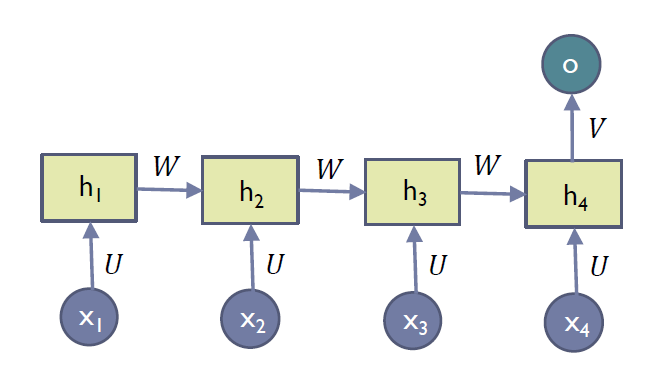


## 이 그림은 one to many, many to one , many to many 중 어디에 포함될까요?

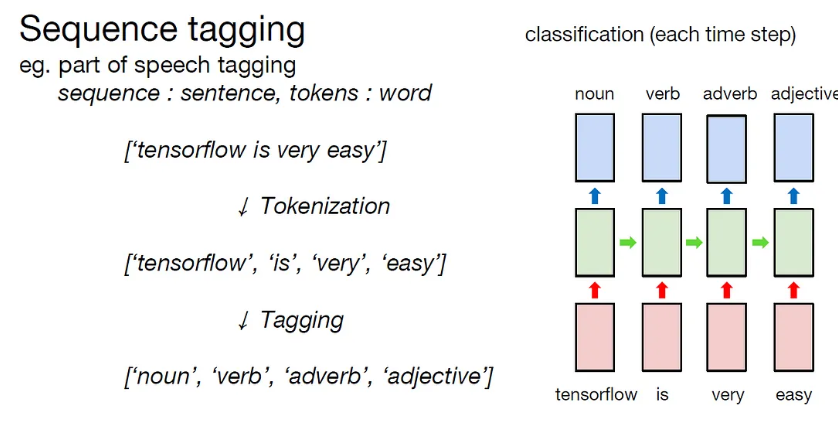

## 그렇다면 이 그림은?

## 2.2 LSTM


#### `torch.nn.LSTM(input_size, hidden_size, batch_first)`
- [pytorch document](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)
- `input_size`: 입력해 주는 특성 값의 개수
- `hidden_size`: hidden state의 사이즈 지정. 보통 arbitrary 함.
- `batch_first`: 입력으로 받는 데이터의 shape중 첫 번째 차원을 batch로 간주할 것인지를 설정.
  - True: (batch, seq, feature)
  - False: (seq, batch, feature)

In [ ]:
lstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
outputs, _status = lstm(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0])
print(_status[0].shape)

tensor([[[-0.0573, -0.0195, -0.0582],
         [-0.2317,  0.1650, -0.2457],
         [-0.1562,  0.1236, -0.1890],
         [-0.1692,  0.1393, -0.2082],
         [-0.2325,  0.2229, -0.2452]],

        [[-0.2066,  0.1875, -0.2237],
         [-0.2119,  0.2153, -0.1999],
         [-0.1520,  0.1765, -0.2018],
         [-0.1630,  0.1631, -0.2121],
         [-0.1656,  0.1546, -0.2160]],

        [[-0.1178,  0.1095, -0.1355],
         [-0.1451,  0.1381, -0.1832],
         [-0.2462,  0.2409, -0.3262],
         [-0.2461,  0.2339, -0.3349],
         [-0.1730,  0.1384, -0.2115]]], grad_fn=<TransposeBackward0>)
torch.Size([3, 5, 3])

tensor([[[-0.2325,  0.2229, -0.2452],
         [-0.1656,  0.1546, -0.2160],
         [-0.1730,  0.1384, -0.2115]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])
